In [1]:
import matplotlib.pyplot as plt

def fcfs(requests, start):
    total_seek_time = 0
    current = start
    sequence = [current]
    for request in requests:
        total_seek_time += abs(request - current)
        current = request
        sequence.append(current)
    return total_seek_time, sequence

def scan(requests, start, direction='right'):
    total_seek_time = 0
    current = start
    sequence = [current]
    requests.sort()
    if direction == 'left':
        requests.reverse()
    i = requests.index(current)
    for request in requests[i:]:
        total_seek_time += abs(request - current)
        current = request
        sequence.append(current)
    if direction == 'right':
        total_seek_time += abs(current - max(requests))
        current = max(requests)
        sequence.append(current)
        for request in reversed(requests[:i]):
            total_seek_time += abs(request - current)
            current = request
            sequence.append(current)
    else:
        total_seek_time += abs(current - min(requests))
        current = min(requests)
        sequence.append(current)
        for request in reversed(requests[:i]):
            total_seek_time += abs(request - current)
            current = request
            sequence.append(current)
    return total_seek_time, sequence

def look(requests, start, direction='right'):
    total_seek_time = 0
    current = start
    sequence = [current]
    requests.sort()
    if direction == 'left':
        requests.reverse()
    i = requests.index(current)
    for request in requests[i:]:
        total_seek_time += abs(request - current)
        current = request
        sequence.append(current)
    if direction == 'right':
        for request in reversed(requests[:i]):
            total_seek_time += abs(request - current)
            current = request
            sequence.append(current)
    else:
        for request in reversed(requests[:i]):
            total_seek_time += abs(request - current)
            current = request
            sequence.append(current)
    return total_seek_time, sequence

def cscan(requests, start, direction='right'):
    total_seek_time = 0
    current = start
    sequence = [current]
    requests.sort()
    if direction == 'left':
        requests.reverse()
    i = requests.index(current)
    for request in requests[i:]:
        total_seek_time += abs(request - current)
        current = request
        sequence.append(current)
    if direction == 'right':
        total_seek_time += abs(current - max(requests))
        current = max(requests)
        sequence.append(current)
        total_seek_time += abs(current - min(requests))
        current = min(requests)
        sequence.append(current)
        for request in requests[:i]:
            total_seek_time += abs(request - current)
            current = request
            sequence.append(current)
    else:
        total_seek_time += abs(current - min(requests))
        current = min(requests)
        sequence.append(current)
        total_seek_time += abs(current - max(requests))
        current = max(requests)
        sequence.append(current)
        for request in requests[:i]:
            total_seek_time += abs(request - current)
            current = request
            sequence.append(current)
    return total_seek_time, sequence

requests = [10, 22, 20, 2, 40, 6, 38]
start = 20

# Calculate total seek time and disk arm movement sequence for each algorithm
fcfs_time, fcfs_sequence = fcfs(requests, start)
scan_right_time, scan_right_sequence=scan(requests, start, direction='right')
scan_left_time, scan_left_sequence = scan(requests, start, direction='left')
look_right_time, look_right_sequence = look(requests, start, direction='right')
look_left_time, look_left_sequence = look(requests, start, direction='left')
cscan_right_time, cscan_right_sequence = cscan(requests, start, direction='right')
cscan_left_time, cscan_left_sequence = cscan(requests, start, direction='left')

In [2]:
print(f"FCFS total seek time: {fcfs_time} msec")
print(f"SCAN (right) total seek time: {scan_right_time} msec")
print(f"SCAN (left) total seek time: {scan_left_time} msec")
print(f"LOOK (right) total seek time: {look_right_time} msec")
print(f"LOOK (left) total seek time: {look_left_time} msec")
print(f"C-SCAN (right) total seek time: {cscan_right_time} msec")
print(f"C-SCAN (left) total seek time: {cscan_left_time} msec")

FCFS total seek time: 146 msec
SCAN (right) total seek time: 58 msec
SCAN (left) total seek time: 56 msec
LOOK (right) total seek time: 58 msec
LOOK (left) total seek time: 56 msec
C-SCAN (right) total seek time: 66 msec
C-SCAN (left) total seek time: 74 msec


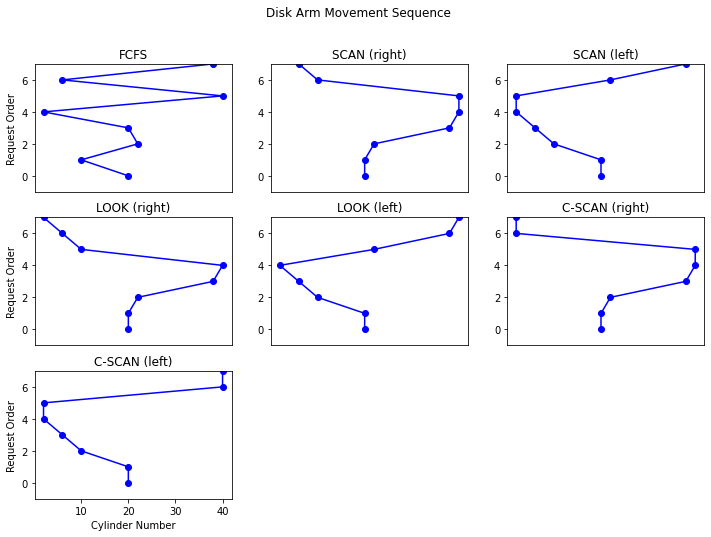

In [3]:
plt.figure(figsize=(12, 8))
plt.suptitle("Disk Arm Movement Sequence")

plt.subplot(3, 3, 1)
plt.plot(fcfs_sequence, range(len(fcfs_sequence)), 'bo-')
plt.title("FCFS")
plt.ylabel("Request Order")
plt.ylim([-1, len(requests)])
plt.xticks([])

plt.subplot(3, 3, 2)
plt.plot(scan_right_sequence, range(len(scan_right_sequence)), 'bo-')
plt.title("SCAN (right)")
plt.ylim([-1, len(requests)])
plt.xticks([])

plt.subplot(3, 3, 3)
plt.plot(scan_left_sequence, range(len(scan_left_sequence)), 'bo-')
plt.title("SCAN (left)")
plt.ylim([-1, len(requests)])
plt.xticks([])

plt.subplot(3, 3, 4)
plt.plot(look_right_sequence, range(len(look_right_sequence)), 'bo-')
plt.title("LOOK (right)")
plt.ylabel("Request Order")
plt.ylim([-1, len(requests)])
plt.xticks([])

plt.subplot(3, 3, 5)
plt.plot(look_left_sequence, range(len(look_left_sequence)), 'bo-')
plt.title("LOOK (left)")
plt.ylim([-1, len(requests)])
plt.xticks([])

plt.subplot(3, 3, 6)
plt.plot(cscan_right_sequence, range(len(cscan_right_sequence)), 'bo-')
plt.title("C-SCAN (right)")
plt.ylim([-1, len(requests)])
plt.xticks([])

plt.subplot(3, 3, 7)
plt.plot(cscan_left_sequence, range(len(cscan_left_sequence)), 'bo-')
plt.title("C-SCAN (left)")
plt.xlabel("Cylinder Number")
plt.ylabel("Request Order")
plt.ylim([-1, len(requests)])

plt.show()

FCFS sequence: [20, 10, 22, 20, 2, 40, 6, 38]
FCFS seek time: 876 msec
SCAN sequence: [10, 2, 6, 20, 22, 38, 40, 20]
SCAN seek time: 396 msec
LOOK sequence: [10, 2, 6, 20, 22, 38, 40]
LOOK seek time: 276 msec
C-SCAN sequence: [10, 2, 6, 20, 22, 38, 40, 40, 2]
C-SCAN seek time: 504 msec


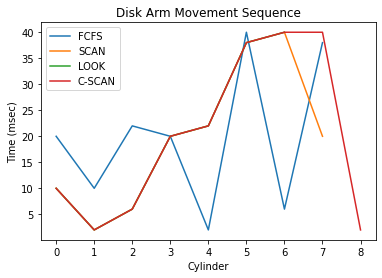

In [2]:
import matplotlib.pyplot as plt

def fcfs(start, requests):
    # Implement FCFS algorithm
    sequence = [start] + requests
    movement = sum([abs(sequence[i] - sequence[i-1]) for i in range(1, len(sequence))])
    return sequence, movement

def scan(start, requests):
    # Implement SCAN algorithm
    left = [r for r in requests if r < start]
    right = [r for r in requests if r >= start]
    right.sort()
    sequence = left + right + [start]
    movement = sum([abs(sequence[i] - sequence[i-1]) for i in range(1, len(sequence))])
    return sequence, movement

def look(start, requests):
    # Implement LOOK algorithm
    left = [r for r in requests if r < start]
    right = [r for r in requests if r >= start]
    right.sort()
    sequence = left + right
    movement = sum([abs(sequence[i] - sequence[i-1]) for i in range(1, len(sequence))])
    return sequence, movement

def c_scan(start, requests):
    # Implement C-SCAN algorithm
    left = [r for r in requests if r < start]
    right = [r for r in requests if r >= start]
    right.sort()
    sequence = left + right + [max(requests)] + [min(requests)]
    movement = sum([abs(sequence[i] - sequence[i-1]) for i in range(1, len(sequence))])
    return sequence, movement

# Input parameters
start = 20
requests = [10, 22, 20, 2, 40, 6, 38]

# Calculate FCFS sequence and seek time
fcfs_sequence, fcfs_movement = fcfs(start, requests)
print("FCFS sequence:", fcfs_sequence)
print("FCFS seek time:", fcfs_movement*6, "msec")

# Calculate SCAN sequence and seek time
scan_sequence, scan_movement = scan(start, requests)
print("SCAN sequence:", scan_sequence)
print("SCAN seek time:", scan_movement*6, "msec")

# Calculate LOOK sequence and seek time
look_sequence, look_movement = look(start, requests)
print("LOOK sequence:", look_sequence)
print("LOOK seek time:", look_movement*6, "msec")

# Calculate C-SCAN sequence and seek time
c_scan_sequence, c_scan_movement = c_scan(start, requests)
print("C-SCAN sequence:", c_scan_sequence)
print("C-SCAN seek time:", c_scan_movement*6, "msec")

# Plot disk arm movement sequence for all algorithms
fig, ax = plt.subplots()
ax.set_title("Disk Arm Movement Sequence")
ax.set_xlabel("Cylinder")
ax.set_ylabel("Time (msec)")
ax.plot(range(len(fcfs_sequence)), fcfs_sequence, label="FCFS")
ax.plot(range(len(scan_sequence)), scan_sequence, label="SCAN")
ax.plot(range(len(look_sequence)), look_sequence, label="LOOK")
ax.plot(range(len(c_scan_sequence)), c_scan_sequence, label="C-SCAN")
ax.legend()
plt.show()


In [3]:
def fcfs(start, requests):
    # Implement FCFS algorithm
    sequence = [start] + requests
    movement = sum([abs(sequence[i] - sequence[i-1]) for i in range(1, len(sequence))])
    return sequence, movement

def scan(start, requests):
    # Implement SCAN algorithm
    left = [r for r in requests if r < start]
    right = [r for r in requests if r >= start]
    right.sort()
    sequence = left + right + [start]
    movement = sum([abs(sequence[i] - sequence[i-1]) for i in range(1, len(sequence))])
    return sequence, movement

def look(start, requests):
    # Implement LOOK algorithm
    left = [r for r in requests if r < start]
    right = [r for r in requests if r >= start]
    right.sort()
    sequence = left + right
    movement = sum([abs(sequence[i] - sequence[i-1]) for i in range(1, len(sequence))])
    return sequence, movement

def c_scan(start, requests):
    # Implement C-SCAN algorithm
    left = [r for r in requests if r < start]
    right = [r for r in requests if r >= start]
    right.sort()
    sequence = left + right + [max(requests)] + [min(requests)]
    movement = sum([abs(sequence[i] - sequence[i-1]) for i in range(1, len(sequence))])
    return sequence, movement

# Input parameters
start = 20
requests = [10, 22, 20, 2, 40, 6, 38]

# Calculate FCFS sequence and seek time
fcfs_sequence, fcfs_movement = fcfs(start, requests)
print("FCFS sequence:", fcfs_sequence)
print("FCFS seek time:", fcfs_movement*6, "msec")

# Calculate SCAN sequence and seek time
scan_sequence, scan_movement = scan(start, requests)
print("SCAN sequence:", scan_sequence)
print("SCAN seek time:", scan_movement*6, "msec")

# Calculate LOOK sequence and seek time
look_sequence, look_movement = look(start, requests)
print("LOOK sequence:", look_sequence)
print("LOOK seek time:", look_movement*6, "msec")

# Calculate C-SCAN sequence and seek time
c_scan_sequence, c_scan_movement = c_scan(start, requests)
print("C-SCAN sequence:", c_scan_sequence)
print("C-SCAN seek time:", c_scan_movement*6, "msec")

FCFS sequence: [20, 10, 22, 20, 2, 40, 6, 38]
FCFS seek time: 876 msec
SCAN sequence: [10, 2, 6, 20, 22, 38, 40, 20]
SCAN seek time: 396 msec
LOOK sequence: [10, 2, 6, 20, 22, 38, 40]
LOOK seek time: 276 msec
C-SCAN sequence: [10, 2, 6, 20, 22, 38, 40, 40, 2]
C-SCAN seek time: 504 msec


FCFS sequence: [20, 10, 22, 20, 2, 40, 6, 38]
FCFS total movement: 146
FCFS total seek time: 876 msec
SCAN sequence: [20, 10, 6, 2, 20, 22, 38, 40]
SCAN total movement: 56
SCAN total seek time: 336 msec
LOOK sequence: [20, 10, 6, 2, 20, 22, 38, 40]
LOOK total movement: 56
LOOK total seek time: 336 msec
C-SCAN sequence: [20, 22, 38, 40, 2, 6, 10, 20]
C-SCAN total movement: 76
C-SCAN total seek time: 456 msec


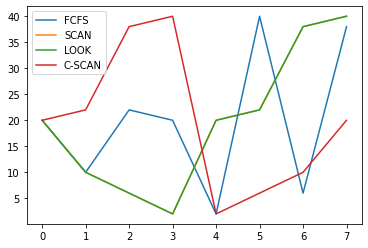

In [4]:
import matplotlib.pyplot as plt

# Define disk requests
requests = [10, 22, 20, 2, 40, 6, 38]

# Define initial position of disk arm
start = 20

# Define seek time per cylinder
seek_time = 6

# First Come First Serve
fcfs_sequence = [start] + requests
fcfs_movement = sum([abs(fcfs_sequence[i] - fcfs_sequence[i-1]) for i in range(1, len(fcfs_sequence))])
fcfs_seek_time = fcfs_movement * seek_time

print("FCFS sequence:", fcfs_sequence)
print("FCFS total movement:", fcfs_movement)
print("FCFS total seek time:", fcfs_seek_time, "msec")

# SCAN
scan_sequence = [start] + requests
scan_sequence.sort()
scan_index = scan_sequence.index(start)
scan_sequence = scan_sequence[scan_index::-1] + scan_sequence[scan_index+1:]
scan_movement = sum([abs(scan_sequence[i] - scan_sequence[i-1]) for i in range(1, len(scan_sequence))])
scan_seek_time = scan_movement * seek_time

print("SCAN sequence:", scan_sequence)
print("SCAN total movement:", scan_movement)
print("SCAN total seek time:", scan_seek_time, "msec")

# LOOK
look_sequence = [start] + requests
look_sequence.sort()
look_index = look_sequence.index(start)
look_sequence = look_sequence[look_index::-1] + look_sequence[look_index+1:]
look_movement = sum([abs(look_sequence[i] - look_sequence[i-1]) for i in range(1, len(look_sequence))])
look_seek_time = look_movement * seek_time

print("LOOK sequence:", look_sequence)
print("LOOK total movement:", look_movement)
print("LOOK total seek time:", look_seek_time, "msec")

# C-SCAN
cscan_sequence = [start] + requests
cscan_sequence.sort()
cscan_index = cscan_sequence.index(start)
cscan_sequence = cscan_sequence[cscan_index+1:] + cscan_sequence[:cscan_index]
cscan_sequence = cscan_sequence + [cscan_sequence[0]]
cscan_movement = sum([abs(cscan_sequence[i] - cscan_sequence[i-1]) for i in range(1, len(cscan_sequence))])
cscan_seek_time = cscan_movement * seek_time

print("C-SCAN sequence:", cscan_sequence)
print("C-SCAN total movement:", cscan_movement)
print("C-SCAN total seek time:", cscan_seek_time, "msec")

# Plot disk arm movement sequences
plt.plot(range(len(fcfs_sequence)), fcfs_sequence, label="FCFS")
plt.plot(range(len(scan_sequence)), scan_sequence, label="SCAN")
plt.plot(range(len(look_sequence)), look_sequence, label="LOOK")
plt.plot(range(len(cscan_sequence)), cscan_sequence, label="C-SCAN")
plt.legend()
plt.show()
